# Complex Network Analysis - Part 6
## Master in BigData: SNA Lab - Exercises

This notebook contains exercises on complex network analysis and graph modeling using NetworkX.

**Prerequisites:**
- `facebook.ncol` file should be available in the working directory
- All required libraries should be installed

In [4]:
# Import required libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display plots inline
%matplotlib inline

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


# Part 6. Assortativity, clustering, centrality, path length

## Exercise 1: Assortativity
Load the Karate Club graph and compute the degree assortativity coefficient. 


Create a copy of the graph with g.copy() and store it in a new variable.

Remove all edges where both nodes have degre >= 5
Recalculate the assortativity coefficient
How and why the assortativity changed?

## Exercise 2: Multi-Centrality analysis
- Compute centrality measures (degree, closeness, betweenness)
- Find the top 5 nodes for each centrality measure 
- Create a comparison DataFrame showing which nodes appear in multiple "top 5" lists

Now, remove the most central node (only one) according to betweenness **from a copy of the graph**. Is the graph still connected? 

Calculate average shortest path length on the original graph.
Then, find the largest connected component of the second graph and compute its avg shortest path length.


## Exercise 3: Clustering
Load the facebook network. Compute clustering values for all nodes. Plot a histogram showing the clustering distribution

Who are the nodes with high/low clustering? Make a scatterplot with node degrees on the X axis and clustering coefficients on the y axis


## Exercise 4: Local vs. Global homophily

On the Karate Club graph:
- compute attribute assortativity on the 'club' attribute with  nx.attribute_assortativity_coefficient(G, 'club')
- write a function that inputs the graph and a node, and outputs the fraction of neighbors with the same attribute value of the node. Recall that you can access node n's attribute with g.nodes[n].get(attribute_name)
- test it on node 0, which should output 0.94

In [32]:
G = nx.karate_club_graph()
# Compute attribute assortativity for the Karate Club graph
# The attribute is 'club' (either 'Mr. Hi' or 'Officer')
attribute_assortativity = nx.attribute_assortativity_coefficient(G, 'club')
print(f"Attribute assortativity (club): {attribute_assortativity:.4f}")

# Function to compute local homophily for a given node
def local_homophily(graph, node, attribute):
    node_value = graph.nodes[node].get(attribute)
    neighbors = list(graph.neighbors(node))
    neigh_attrs = [graph.nodes[n].get(attribute) for n in neighbors]
    same = sum(1 for attr in neigh_attrs if attr == node_value)
    return same / len(neighbors)

# Example usage: compute local homophily for node 0
fraction_same_club = local_homophily(G, 0, 'club')
print(f"Fraction of neighbors of node 0 with the same club: {fraction_same_club:.2f}")

Attribute assortativity (club): 0.7175
Fraction of neighbors of node 0 with the same club: 0.94


Compute it for all nodes and plot a histogram with the distribution of local homophily.

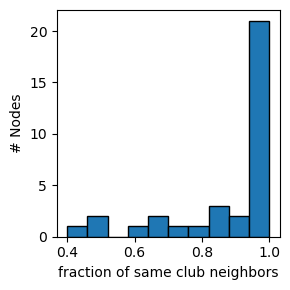

In [35]:
# Compute local homophily for all nodes in the Karate Club graph
local_homophily_values = [
    local_homophily(G, node, 'club') for node in G.nodes()
]

# Plot histogram of local homophily values
plt.figure(figsize=(3, 3))
plt.hist(local_homophily_values, bins=10, edgecolor='black')
plt.xlabel("fraction of same club neighbors")
plt.ylabel("# Nodes")
plt.tight_layout()
plt.show()